## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import MMNIST dataset

In [2]:
from sklearn.datasets import load_digits

In [3]:
dataset=load_digits()
x = dataset.data
y = dataset.target

In [4]:
print(f"Dataset shape : {x.shape}, Lables : {np.unique(y)}")

Dataset shape : (1797, 64), Lables : [0 1 2 3 4 5 6 7 8 9]


<Figure size 640x480 with 0 Axes>

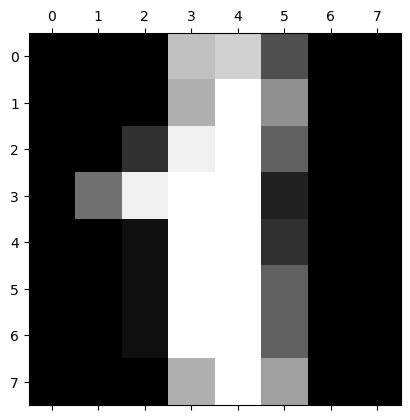

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [5]:
n=1
plt.gray()
plt.matshow(dataset.images[n])
plt.show()
dataset.images[n]

### Visualise some sample images

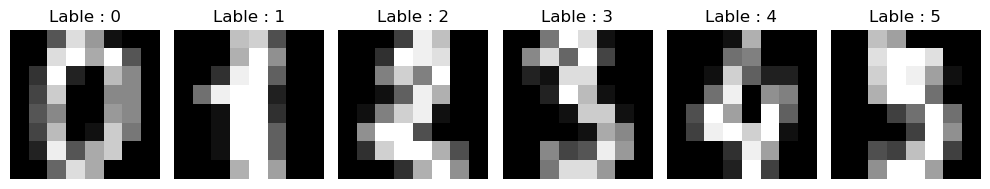

In [6]:
fig,axes = plt.subplots(1,6, figsize=(10,3))
for i , ax in enumerate(axes):
    ax.imshow(dataset.images[i],cmap='gray')
    ax.set_title(f"Lable : {dataset.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Standardised the data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

### Split the data into train and test

In [8]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Dimensionality reduction using PCA(Principal component analysis )

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

### Train the SVM classifier 

In [10]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf",C=1,gamma=0.01)
svm.fit(x_train_pca,y_train)

SVC(C=1, gamma=0.01)

### Prediction and evaluation 

In [11]:
y_pred=svm.predict(x_test_pca)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("\n Classification report : \n",classification_report(y_test,y_pred))
print("\n Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\n Accuracy : \n",accuracy_score(y_test,y_pred))


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.61      0.75        33
           1       1.00      0.89      0.94        28
           2       1.00      0.76      0.86        33
           3       1.00      0.76      0.87        34
           4       1.00      0.85      0.92        46
           5       1.00      0.74      0.85        47
           6       1.00      0.89      0.94        35
           7       1.00      0.79      0.89        34
           8       0.30      1.00      0.46        30
           9       1.00      0.78      0.87        40

    accuracy                           0.80       360
   macro avg       0.93      0.81      0.84       360
weighted avg       0.94      0.80      0.84       360


 Confusion Matrix : 
 [[20  0  0  0  0  0  0  0 13  0]
 [ 0 25  0  0  0  0  0  0  3  0]
 [ 0  0 25  0  0  0  0  0  8  0]
 [ 0  0  0 26  0  0  0  0  8  0]
 [ 0  0  0  0 39  0  0  0  7  0]
 [ 0  0  0  0  0 35  0  0

### Hyperparameter  Tuning

In [13]:
params={
    'C':[1,10,100],
    'gamma':[0.001,0.01,0.1],
    'kernel':['rbf']
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid=params,cv=3)
grid.fit(x_train_pca,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf']})

In [14]:
print("\nBest parameters from GridSearchCV :",grid.best_params_)


Best parameters from GridSearchCV : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


### Evaluate tuned model 

In [15]:
tuned_model=grid.best_estimator_
y_pred_tuned = tuned_model.predict(x_test_pca)
print("\nTuned Model Accuracy : ",accuracy_score(y_test,y_pred_tuned)*100)


Tuned Model Accuracy :  98.88888888888889


### Visualizing PCA components 

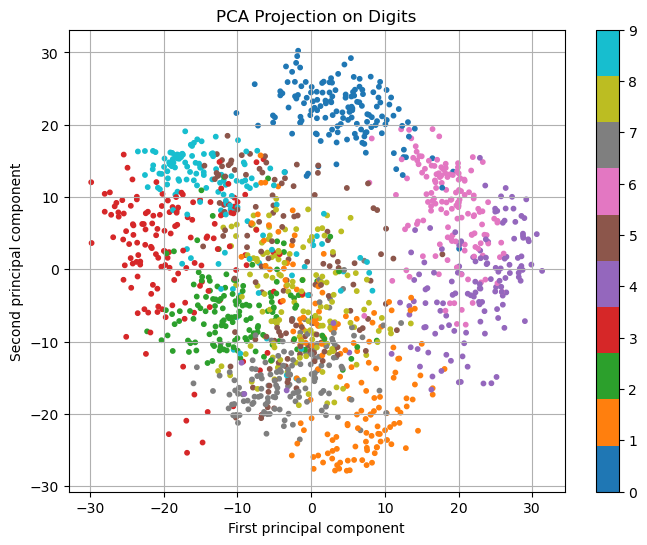

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,cmap='tab10',s=10)
plt.colorbar()
plt.title('PCA Projection on Digits')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.grid(True)
plt.show()

### Sample prediction test

In [17]:
sample_index = 1
sample_input = x_test_pca[sample_index].reshape(1,-1)
print("Predicted label : ",tuned_model.predict(sample_input)[0])
print("Actual label : ",y_test[sample_index])

Predicted label :  9
Actual label :  9


### Save the trained model ,scaler and PCA u\in transformer 

In [18]:
import joblib
joblib.dump(tuned_model,'svm_digit_classifier.pkl')
joblib.dump(sc,'scaler,pkl')
joblib.dump(pca,'pca.pkl')

['pca.pkl']